## Rainfall Weather Forecasting
Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

There are 8425 rows and 23 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
# In this dataset there are 16 float64 and 7 object datatypes available

In [7]:
for i in df.columns:
    print(df[i].value_counts(), ('\n'))

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64 

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 

 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64 

19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64 

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [9]:
#There are many null values are present in this dataset. I am going to remove those columns which has maximum null values. i.e. Evaporation, Sunshine,Cloud9am & Cloud3pm

In [10]:
df=df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [12]:
#I am also removing date column

In [13]:
df=df.drop('Date',axis=1)

In [14]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [15]:
col=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']

In [16]:
#Filling the null values by mode method.
for i in col:
    df[i]=df[i].fillna(value=(df[i].mode()[0]))

In [17]:
con=list(df.select_dtypes(include='float64'))

In [18]:
#Filling the null values by mean method.
for i in con:
    df[i]=df[i].fillna(value=(df[i].mean()))

In [19]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [20]:
#Converting category datatype into continues datatype of RainToday & RainTomorrow columns
df['RainToday']=df['RainToday'].replace({'Yes':1, 'No':0})

In [21]:
df['RainTomorrow']=df['RainTomorrow'].replace({'Yes':1, 'No':0})

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [23]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,17.762015,22.442934,0.236202,0.236320
std,5.379488,6.114516,10.309308,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,5.608301,5.945849,0.424773,0.424846
min,-2.000000,8.200000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,1.900000,7.300000,0.000000,0.000000
25%,9.300000,19.300000,0.000000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,13.800000,18.100000,0.000000,0.000000
50%,13.200000,23.300000,0.000000,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,17.762015,22.000000,0.000000,0.000000
75%,17.300000,28.000000,1.400000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,21.900000,26.300000,0.000000,0.000000
max,28.500000,45.500000,371.000000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,39.400000,44.100000,1.000000,1.000000


In [24]:
#All Data is present in continues columns
#I am not finding any diffrence between 50% and mean values except RainFall, RainToday & RainTomorrow
#Need to check if there is any outliers present in this dataset

In [25]:
contcol=list(df.select_dtypes(exclude='object'))

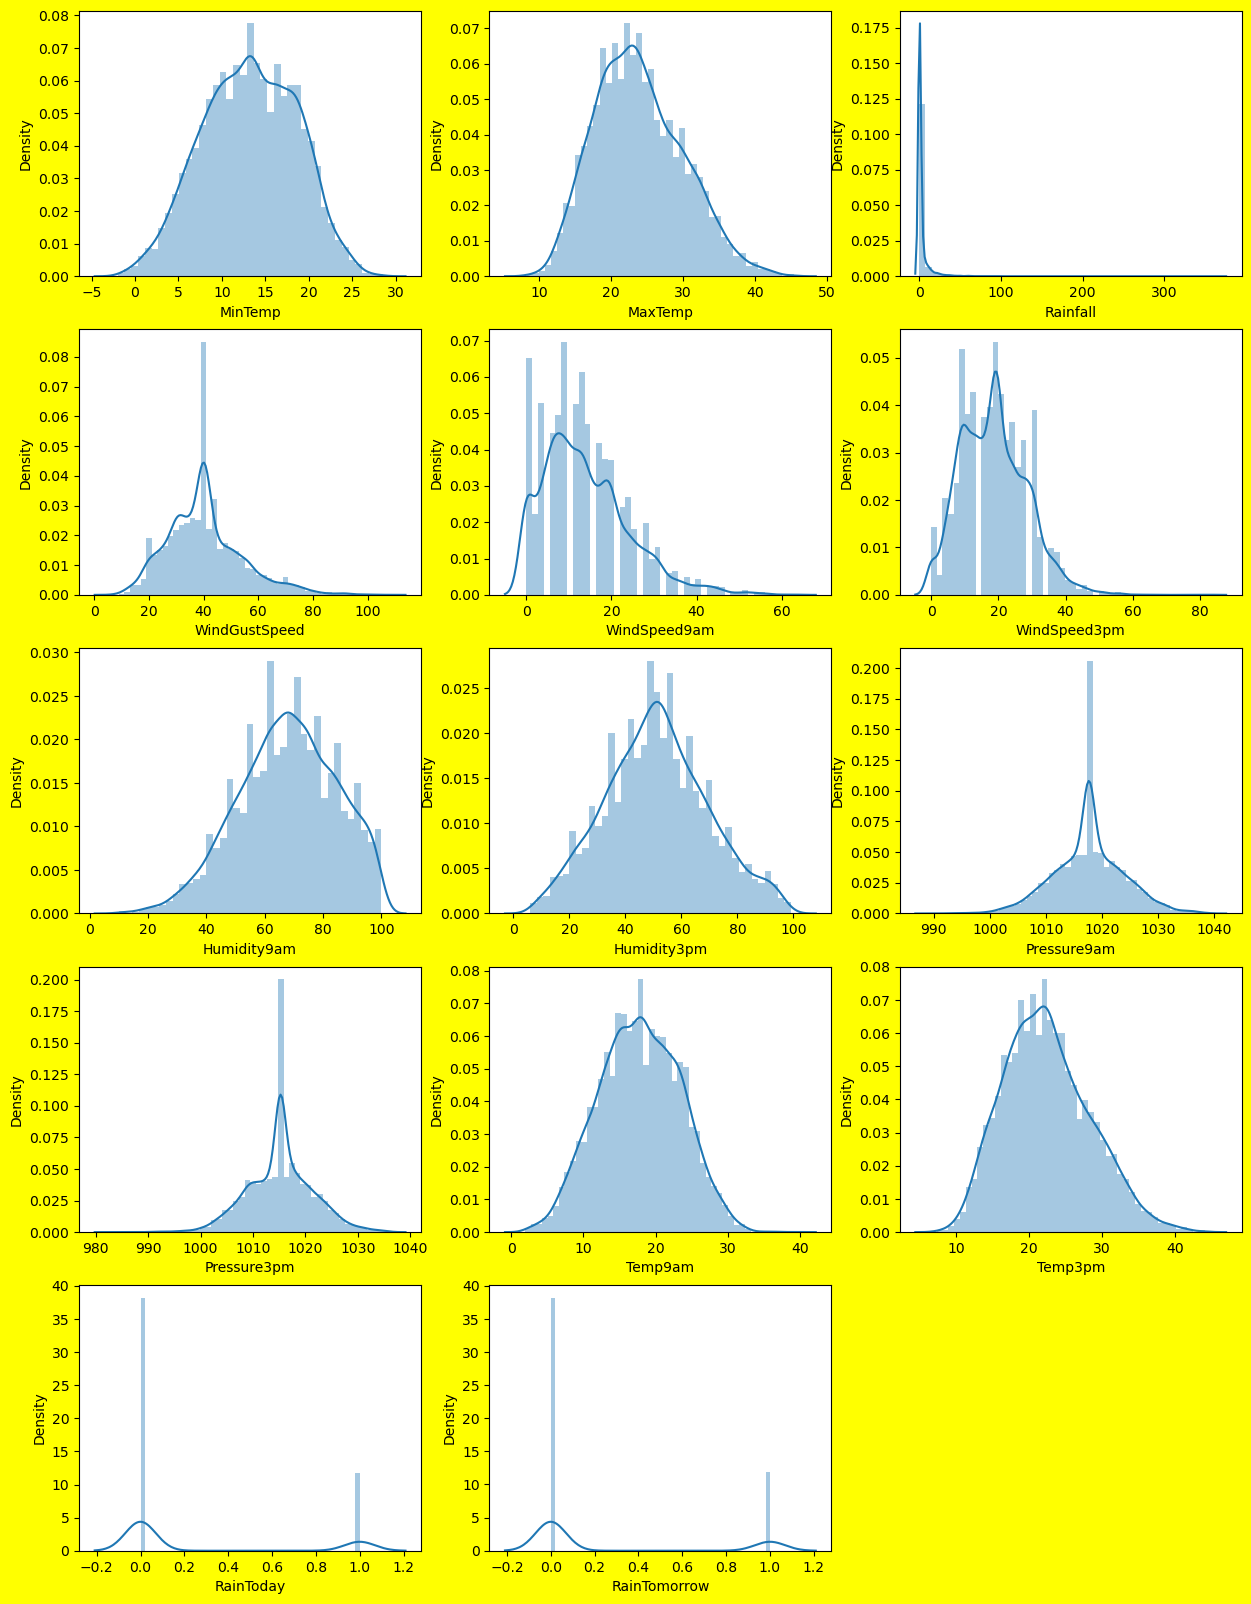

In [26]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,20), facecolor='yellow')
plotnumber=1

for column in df[contcol]:
    if plotnumber<=14:
        ax=plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=10)
        
    plotnumber+=1
plt.show()

In [27]:
#I am not finding any outliers in above dist plot. I will try to check the outliers in Boxplt

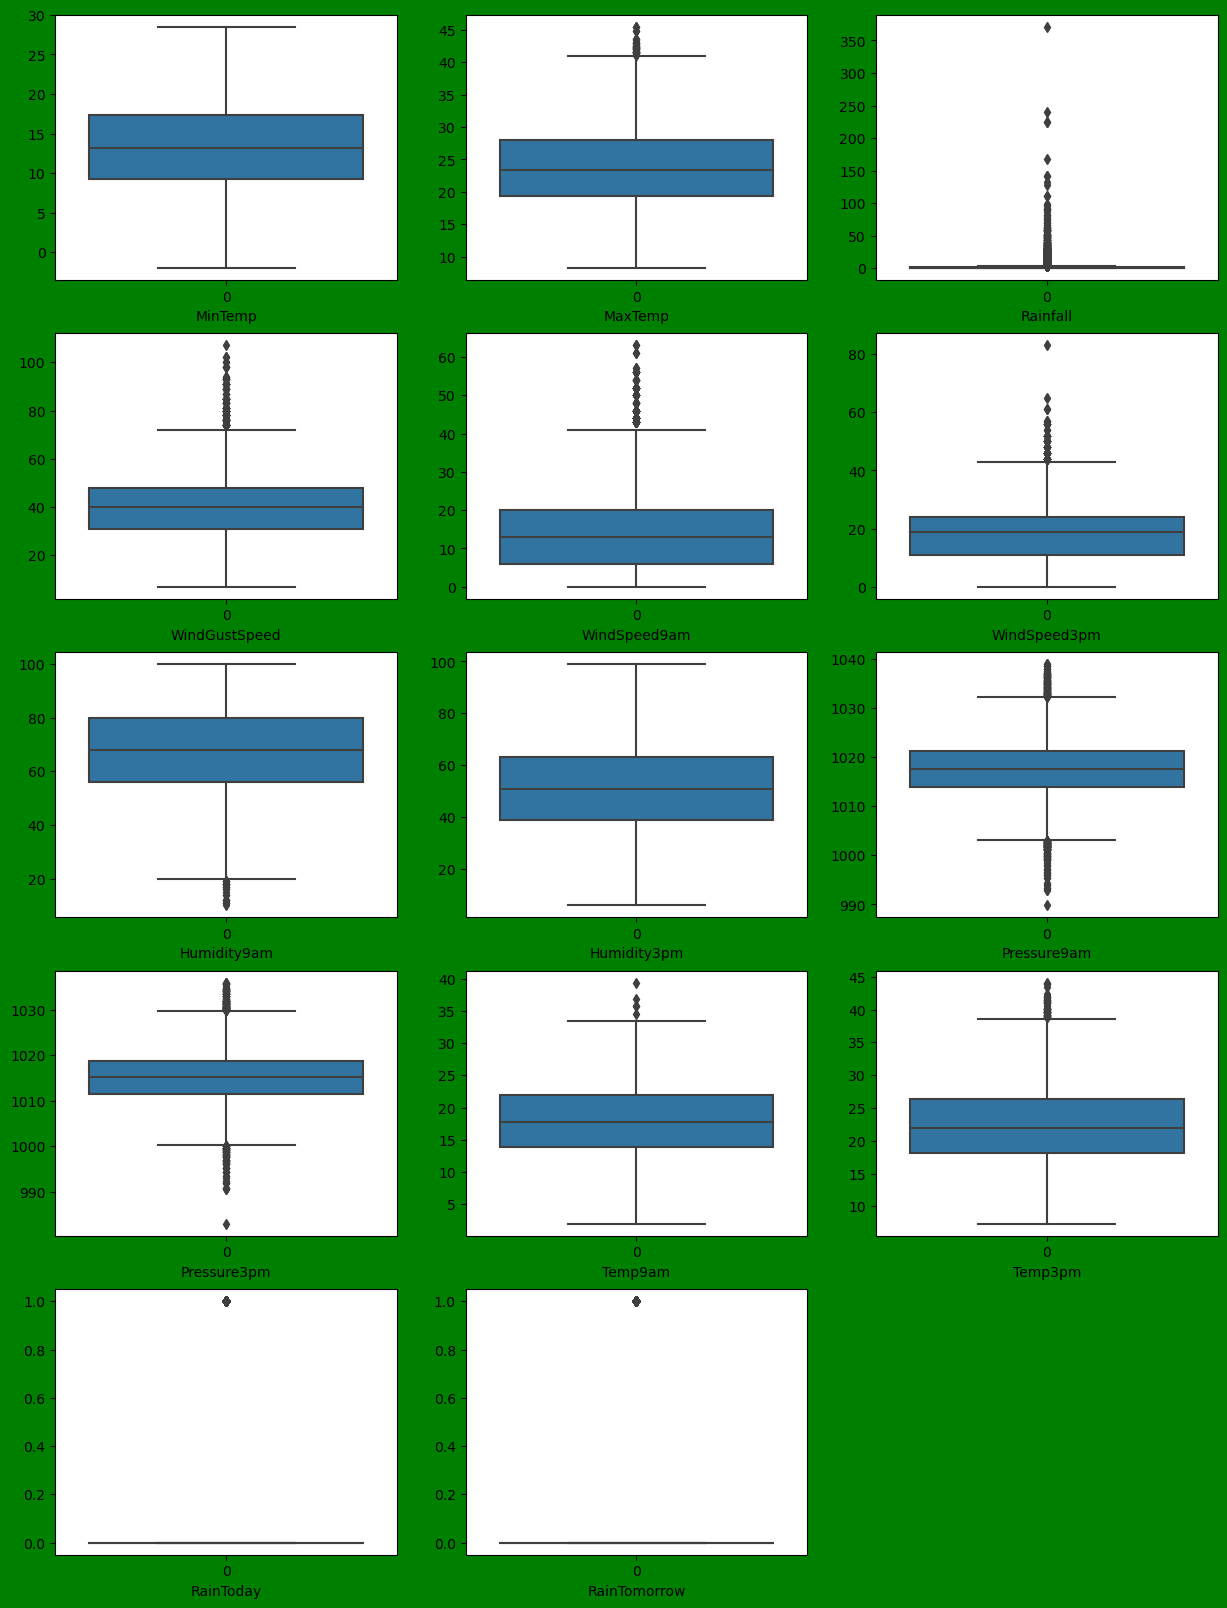

In [28]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,20), facecolor='g')
plotnumber=1

for column in df[contcol]:
    if plotnumber<=14:
        ax=plt.subplot(5,3, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=10)
        
    plotnumber+=1
plt.show()

I can see there are outliers present in this dataset. So, I will try to remove these outliers by using zscore

In [29]:
from scipy.stats import zscore

In [30]:
z_score=zscore(df[['MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])

In [31]:
abs_z_score=np.abs(z_score)

In [32]:
filter_entry=(abs_z_score<3).all(axis=1)

In [33]:
df=df[filter_entry]

In [34]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


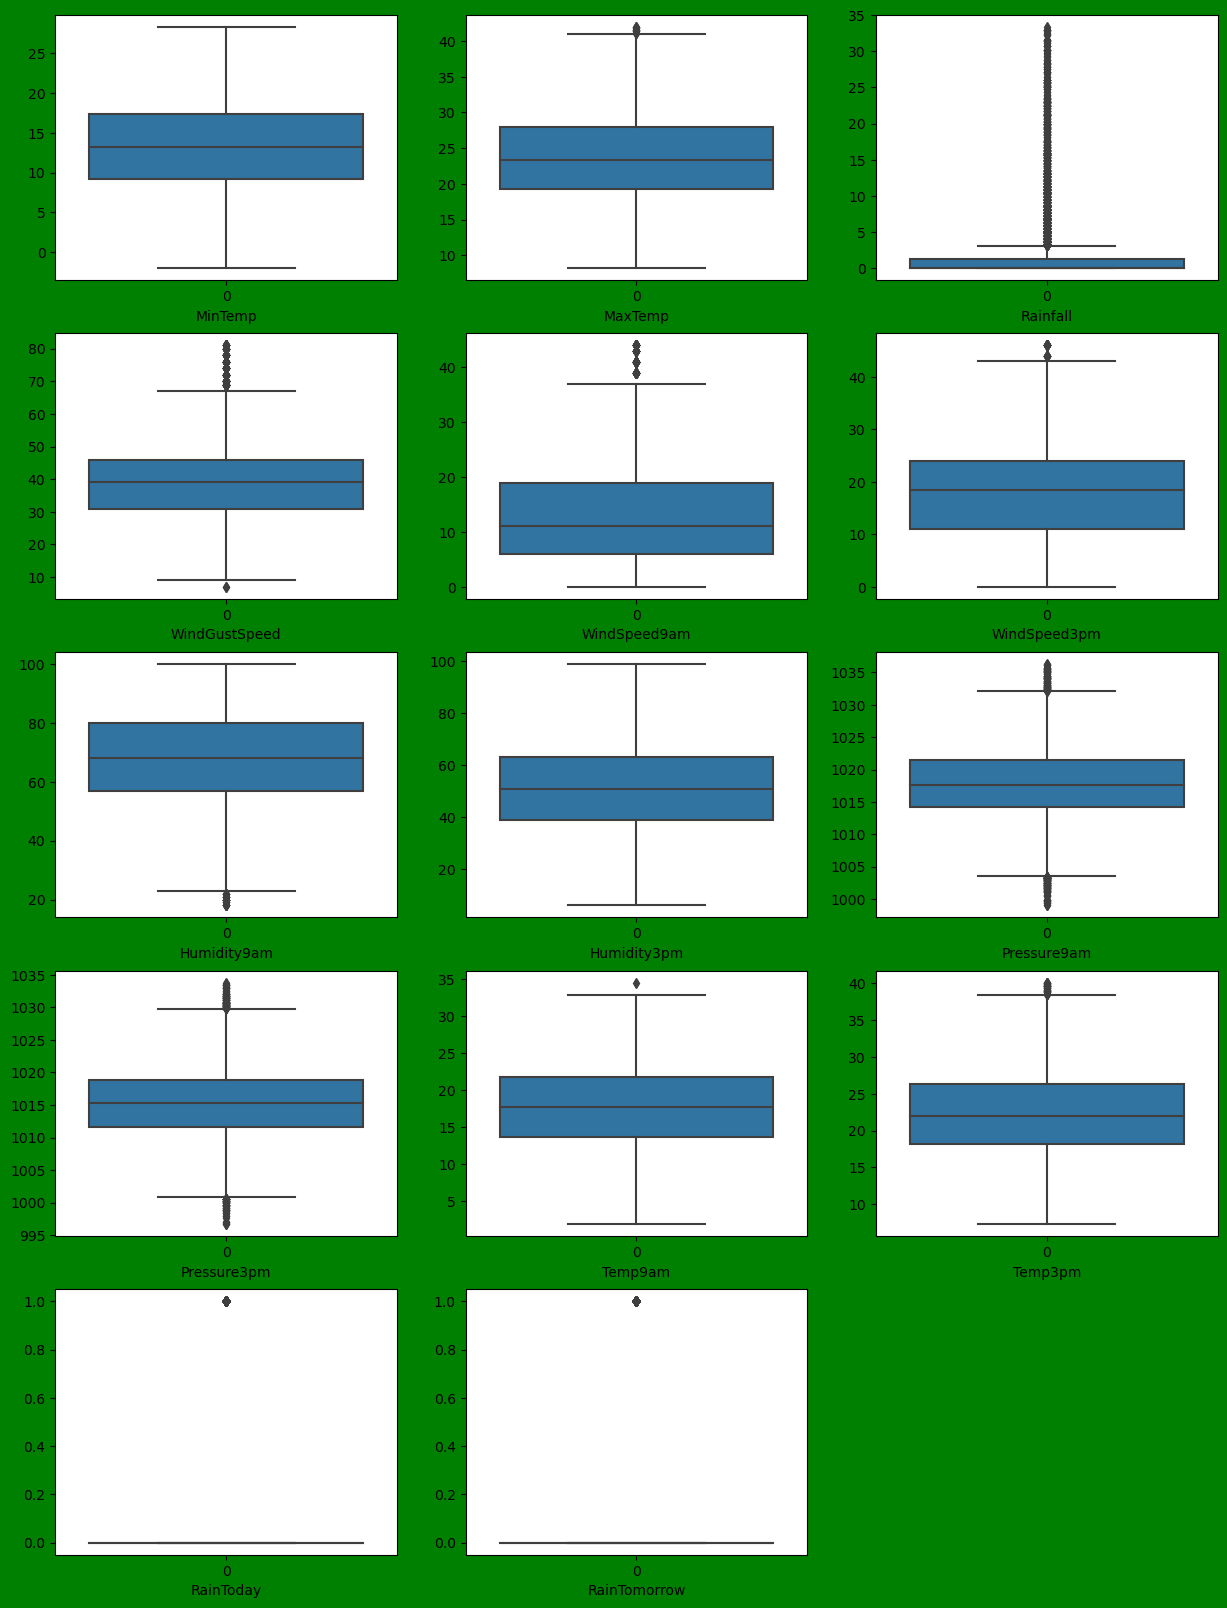

In [35]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,20), facecolor='g')
plotnumber=1

for column in df[contcol]:
    if plotnumber<=14:
        ax=plt.subplot(5,3, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=10)
        
    plotnumber+=1
plt.show()

In [36]:
#I manage to remove some outliers from dataset
# Now I am converting categorical data into continues data

In [37]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [38]:
col=list(df.select_dtypes(include='object'))

In [39]:
for i in col:
    df1=lab_enc.fit_transform(df[i])
    df[i]=df1

In [40]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [41]:
#Dividing independent and dependent columns in to two variables i.e. x & y.
x=df.drop('RainTomorrow', axis=1)
y=df.RainTomorrow

In [42]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [43]:
x_scaled=scalar.fit_transform(x)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
#Checking if there is any multicollinearity problem in columns by using VIF technique.
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.149040,Location
1,7.521568,MinTemp
2,25.994653,MaxTemp
3,1.954031,Rainfall
4,1.592787,WindGustDir
5,2.301560,WindGustSpeed
6,1.334012,WindDir9am
7,1.476487,WindDir3pm
8,1.999018,WindSpeed9am
9,1.933646,WindSpeed3pm


In [46]:
#There are some columns which has maximum VIF value and need to remove i.e.MaxTemp, Temp3pm
df=df.drop(['MaxTemp','Temp3pm'],axis=1)

In [47]:
x=df.drop('RainTomorrow', axis=1)
y=df.RainTomorrow

0    6226
1    1835
Name: RainTomorrow, dtype: int64


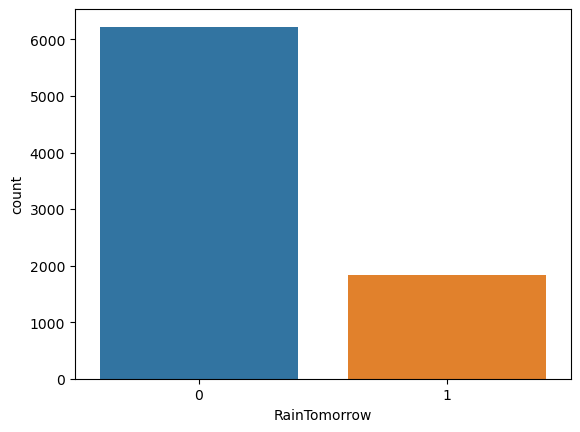

In [48]:
ax=sns.countplot(x='RainTomorrow', data=df)
print(df['RainTomorrow'].value_counts())

There is imbalanced data in 'RainTomorro' column and need to balance the diffrence by applying SMOTE technique

In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [50]:
Counter(df['RainTomorrow'])

Counter({0: 6226, 1: 1835})

In [51]:
ove_smp=SMOTE(random_state=55,k_neighbors=3, sampling_strategy=0.80)

In [52]:
x1, y1=ove_smp.fit_resample(x_scaled,y)

In [53]:
print('The number of classes before fit {}'.format(Counter(y)))
print('The number of classes after fit {}'.format(Counter(y1)))

The number of classes before fit Counter({0: 6226, 1: 1835})
The number of classes after fit Counter({0: 6226, 1: 4980})


## Now I am going to build the model to whether or not it will rain tomorrow.

In [54]:
#Now I am builidng the models and find the best model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
svc=SVC()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [56]:
mdl=[rfc,etc,lr,svc,knn,dtc,gbc,abc,bc]

In [57]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size=0.30, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 99.98725140234575
Accuracy Score of Test Data: 91.99881023200476
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 99.98725140234575
Accuracy Score of Test Data: 93.12908982748364
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 76.00713921468638
Accuracy Score of Test Data: 75.72873289708507
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 83.45232024477308
Accuracy Score of Test Data: 80.57703747769185
Model Name:  SVC()


Accuracy Score of Train Data: 90.33656297807241
Accuracy Score of Test Data: 86.16894705532421
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 99.98725140234575
Accuracy Score of Test Data: 85.5145746579417
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 84.82916879143293
Accuracy Score of Test Data: 82.39143367043427
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 80.1631820499745
Accuracy Score of Test Data: 79.

In [58]:
#Every Model has givin the good score. No I will try to check CV score on all the model.
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'SVC':svc,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [59]:
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.84872908 0.85794045 0.89081886 0.82258065 0.84925558]
Score Mean:  0.8538649219508369
diffrent Between Accuracy Score and CV score is : 0.04411247245725358


Model Name is : ExtraTreesClassifier()
Score:  [0.84624923 0.86166253 0.89330025 0.83126551 0.84863524]
Score Mean:  0.8562225497239396
diffrent Between Accuracy Score and CV score is : 0.04026763469009964


Model Name is : LogisticRegression()
Score:  [0.84810911 0.80086849 0.79094293 0.8207196  0.85794045]
Score Mean:  0.8237161154946087
diffrent Between Accuracy Score and CV score is : 0.07366639491586136


Model Name is : SVC()
Score:  [0.84562926 0.81761787 0.82009926 0.82630273 0.84863524]
Score Mean:  0.8316568698185801
diffrent Between Accuracy Score and CV score is : 0.07256680656452519


Model Name is : KNeighborsClassifier()
Score:  [0.80533168 0.81327543 0.79962779 0.7971464  0.81203474]
Score Mean:  0.8054832094689702
diffrent Between Accuracy Score and CV score is :

After seeing CV score of all model I can say ExtraTreesClassifier is the best model among all other models. Now I will try to hypertuning this model

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param={'criterion':['gini','entropy'],
      'random_state':[10,50],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55,150]}

In [62]:
gcv=GridSearchCV(etc,param,cv=5)

In [64]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 35],
                         'n_estimators': [10, 55, 150], 'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50]})

In [65]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 35,
 'n_estimators': 150,
 'n_jobs': -2,
 'random_state': 50}

In [66]:
final_model=ExtraTreesClassifier(criterion='entropy', max_depth=35,n_estimators=150,n_jobs=-2, random_state=50)

In [70]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.9336704342653183

After tunning parameters I got 93% accuracy score

## Now I am going to build the model to predict how much rainfall could be there

In [107]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [108]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [109]:
#Removing unnecessarycolumns from dataset.
df1=df1.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'], axis=1)

In [110]:
col=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow']

In [111]:
#Filling the null values by mode method.
for i in col:
    df1[i]=df1[i].fillna(value=(df1[i].mode()[0]))

In [112]:
con=list(df1.select_dtypes(include='float64'))

In [113]:
#Filling the null values by mean method.
for i in con:
    df1[i]=df1[i].fillna(value=(df1[i].mean()))

In [114]:
df.isnull().sum()

Location         0
MinTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
RainToday        0
RainTomorrow     0
dtype: int64

In [115]:
#Converting category datatype into continues datatype of RainToday & RainTomorrow columns
df1['RainToday']=df1['RainToday'].replace({'Yes':1, 'No':0})

In [116]:
df1['RainTomorrow']=df1['RainTomorrow'].replace({'Yes':1, 'No':0})

In [117]:
contcol=list(df1.select_dtypes(exclude='object'))

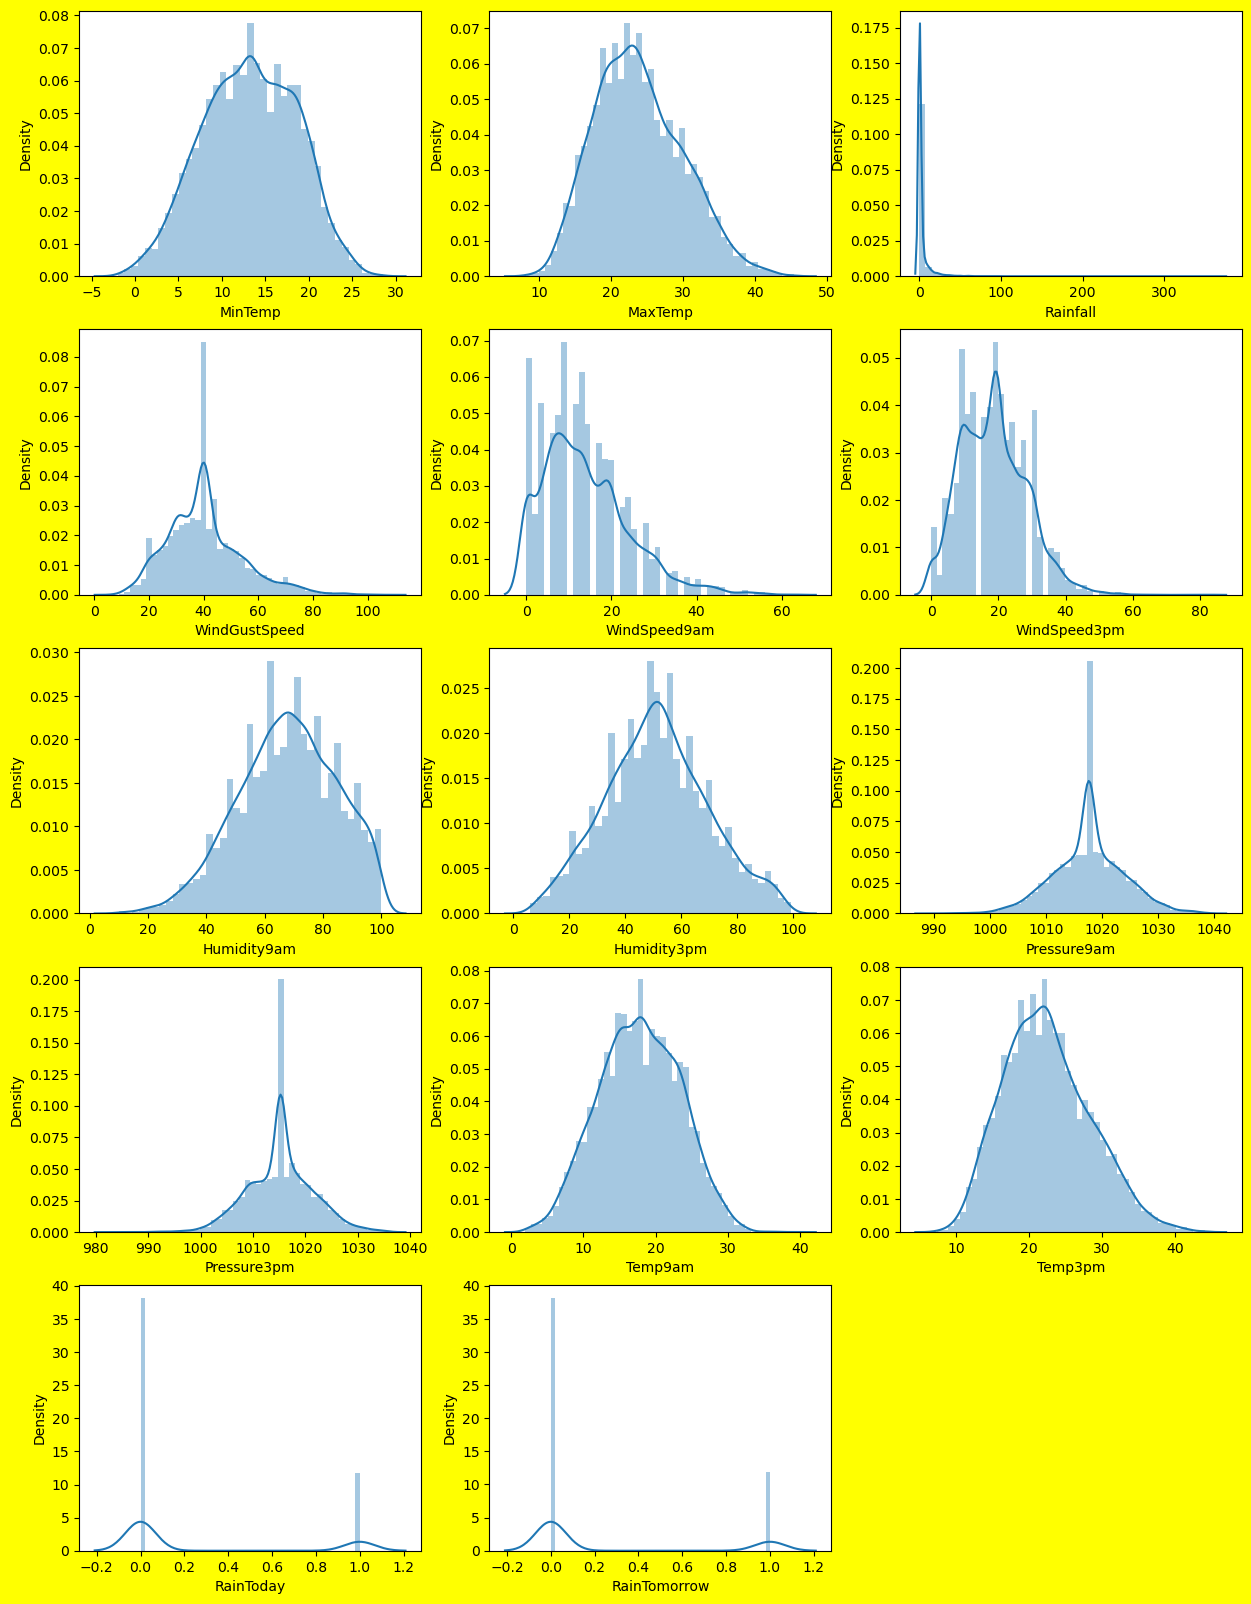

In [118]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,20), facecolor='yellow')
plotnumber=1

for column in df1[contcol]:
    if plotnumber<=14:
        ax=plt.subplot(5,3, plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=10)
        
    plotnumber+=1
plt.show()

I can see there are outliers present in this dataset. So, I will try to remove these outliers by using zscore

In [119]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [120]:
col=list(df1.select_dtypes(include='object'))

In [121]:
for i in col:
    df2=lab_enc.fit_transform(df1[i])
    df1[i]=df2

In [122]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [123]:
from scipy.stats import zscore

In [124]:
z_score=zscore(df1[['MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])

In [125]:
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)
df1=df1[filter_entry]

In [126]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [127]:
for i in col:
    df2=lab_enc.fit_transform(df[i])
    df1[i]=df2

In [128]:
#Dividing independent and dependent columns in to two variables i.e. x & y.
x=df1.drop('Rainfall', axis=1)
y=df1.Rainfall

In [129]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [131]:
x_scaled=scalar.fit_transform(x)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
#Checking if there is any multicollinearity problem in columns by using VIF technique
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.154279,Location
1,7.521550,MinTemp
2,26.004708,MaxTemp
3,1.595196,WindGustDir
4,2.382873,WindGustSpeed
5,1.332678,WindDir9am
6,1.477537,WindDir3pm
7,1.997684,WindSpeed9am
8,1.940897,WindSpeed3pm
9,3.751910,Humidity9am


In [135]:
#There are some columns which has maximum VIF value and need to remove i.e.MaxTemp, Temp3pm
df1=df1.drop(['MaxTemp','Temp3pm','Pressure9am','Pressure3pm','Temp9am'],axis=1)

In [136]:
x=df1.drop('Rainfall', axis=1)
y=df1.Rainfall

In [140]:
x_scaled=scalar.fit_transform(x)

In [137]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
ls=Lasso()
rd=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gdr=GradientBoostingRegressor()

In [139]:
mdl=[lr,rfr,dtr,knn,ls,rd,etr,svr,gdr]

In [141]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=r2_score(y_train, y_pred)
        print('r2_score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=r2_score(y_test, pred)
        print('r2_score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

r2_score of Train Data: 48.86222964485548
r2_score of Test Data: 48.62873240629676
Model Name:  LinearRegression()


r2_score of Train Data: 94.50739706664547
r2_score of Test Data: 59.64986496848967
Model Name:  RandomForestRegressor()


r2_score of Train Data: 99.89306066753373
r2_score of Test Data: 28.329792255863495
Model Name:  DecisionTreeRegressor()


r2_score of Train Data: 65.03706064549222
r2_score of Test Data: 46.18529295615398
Model Name:  KNeighborsRegressor()


r2_score of Train Data: 43.05005982383442
r2_score of Test Data: 41.749388070888315
Model Name:  Lasso()


r2_score of Train Data: 48.8622281271466
r2_score of Test Data: 48.627988734177016
Model Name:  Ridge()


r2_score of Train Data: 99.89306066753373
r2_score of Test Data: 60.93362192994404
Model Name:  ExtraTreesRegressor()


r2_score of Train Data: 46.58359199010298
r2_score of Test Data: 40.499611493167556
Model Name:  SVR()


r2_score of Train Data: 62.5375998290195
r2_score of Test Data: 51.5645270793667

ExtraTreesRegressor has given the best score. So, I am going to check the CV score of this model

In [143]:
score=cross_val_score(etr, x_scaled,y)
print('Score: ',score)
print('Score Mean: ',score.mean())
etr.fit(x_train, y_train)
ypred=etr.predict(x_test)
print("diffrent Between Accuracy Score and CV score is :" ,r2_score(y_test, ypred)-(score.mean()))

Score:  [0.48979574 0.62046453 0.71632986 0.60247609 0.53545348]
Score Mean:  0.5929039402807912
diffrent Between Accuracy Score and CV score is : 0.010074083808470302


CV score of EtraTreeRegresson model is 59%. Now I am tuning this model and try to check the best score after hypertunning this model.

In [148]:
param={'criterion':['squared_error', 'absolute_error'],
      'random_state':[10,50],
      'max_depth':[0,20,35],
      'n_jobs':[-2,-1,1],
      'n_estimators':[10,55]}

In [149]:
gcv=GridSearchCV(etr,param,cv=5)

In [150]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [0, 20, 35], 'n_estimators': [10, 55],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50]})

In [151]:
gcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 35,
 'n_estimators': 55,
 'n_jobs': -2,
 'random_state': 10}

In [153]:
final_model=ExtraTreesRegressor(criterion='squared_error', max_depth=35,n_estimators=55,n_jobs=-2, random_state=10)

In [154]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
r2_score(y_test, pred)

0.6007623834581257

After tunning parameters I got 60% r2 score.

In [155]:
import joblib
joblib.dump(final_model,'Rainfall Weather Forecasting.pkl')

['Rainfall Weather Forecasting.pkl']